# SINGAPORE PUBLIC HOUSING (HDB) RESALE PRICE PREDICTION

In [2]:
import os
import pandas as pd

Download raw data from:

https://data.gov.sg/dataset/resale-flat-prices

https://data.gov.sg/dataset/hdb-resale-price-index


In [6]:
# List all files in raw_data directory
!dir raw_data\


 Volume in drive C is Windows
 Volume Serial Number is 2680-8A65

 Directory of C:\Users\JGPC04\Desktop\01_Projects\P02_HDB_Resale_Price_ScikitLearn\raw_data

05/11/2019  03:05 PM    <DIR>          .
05/11/2019  03:05 PM    <DIR>          ..
05/11/2019  03:05 PM            13,208 metadata-resale-flat-prices.txt
05/11/2019  03:05 PM        22,923,132 resale-flat-prices-based-on-approval-date-1990-1999.csv
05/11/2019  03:05 PM        29,739,597 resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
05/11/2019  03:05 PM         3,108,078 resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv
05/11/2019  03:05 PM         5,555,610 resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv
05/11/2019  03:05 PM         4,212,975 resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv
               6 File(s)     65,552,600 bytes
               2 Dir(s)  15,719,440,384 bytes free


In [7]:
# CREATE A LIST CONTAINING THE CSV FILE NAMES:

# Set destination of folder containing raw data
file_loc = 'raw_data/'
# This variable will contain every file in folder
file_list = os.listdir(file_loc)
# This variable only bothers with files ending with '.csv'
file_list_csv = [i for i in file_list if i.endswith('.csv')]
print(file_list_csv)


['resale-flat-prices-based-on-approval-date-1990-1999.csv', 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv', 'resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv', 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv', 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv']


In [12]:
# CREATE A FUNCTION TO LOAD THE DATA FROM THE LIST OF CSV FILES INTO ONE PANDAS DATFRAME:

def CombineDF(file_loc, file_list):
    
    dataset_files = []
    
    for i in file_list:
        dataset_files.append('{}{}'.format(file_loc, i))
        
    frames = [pd.read_csv(f) for f in list(dataset_files)]
    
    # Combine all the pandas dataframes
    
    combi_result = pd.concat(frames, ignore_index=True, sort=True).fillna(0)
    
    return combi_result


In [13]:
# Utilise the newly created functions:
hdb_combi_df = CombineDF(file_loc, file_list_csv)


In [14]:
# Inspect first 5 observations ofhdb_combi_df:
hdb_combi_df.head()


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,0,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
1,309,IMPROVED,1 ROOM,31.0,1977,1990-01,0,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO
2,309,IMPROVED,1 ROOM,31.0,1977,1990-01,0,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
3,309,IMPROVED,1 ROOM,31.0,1977,1990-01,0,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO
4,216,NEW GENERATION,3 ROOM,73.0,1976,1990-01,0,47200.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO


In [45]:
# LOAD QUARTERLY PRICE INDEX

hdb_priceIndex_df = pd.read_csv("raw_data/hdb_price_index.csv")

print(hdb_priceIndex_df.head())
print(hdb_priceIndex_df.tail())


   quarter  index
0  1990-Q1   24.3
1  1990-Q2   24.4
2  1990-Q3   25.0
3  1990-Q4   24.7
4  1991-Q1   24.9
     quarter  index
113  2018-Q2  131.7
114  2018-Q3  131.6
115  2018-Q4  131.4
116  2019-Q1  131.0
117  2019-Q2  130.8


In [49]:
# USE "QUARTER" INFORMATION AS DATAFRAME INDEX

hdb_priceIndex_df = hdb_priceIndex_df.set_index(pd.to_datetime(hdb_priceIndex_df["quarter"]))

del hdb_priceIndex_df['quarter']
hdb_priceIndex_df.head()

,index
quarter,
1990-01-01,24.3
1990-04-01,24.4
1990-07-01,25.0
1990-10-01,24.7
1991-01-01,24.9


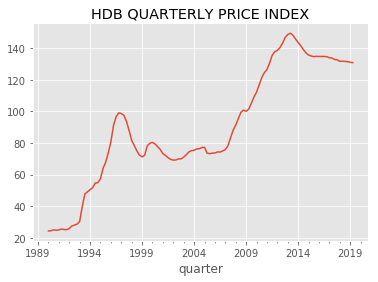

In [51]:
# DISPLAY QUARTERLY PRICE INDEX ON GGPLOT

import matplotlib.pyplot as plt

plt.style.use('ggplot')

hdb_priceIndex_df["index"].plot()
plt.title("HDB QUARTERLY PRICE INDEX")
plt.show()
